In [33]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


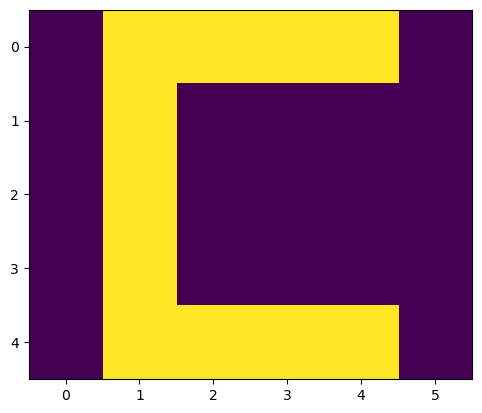

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# Ver la letra a
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [37]:
# converting data and labels into numpy array

"""
Hacer una conversion de la matriz a vector
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


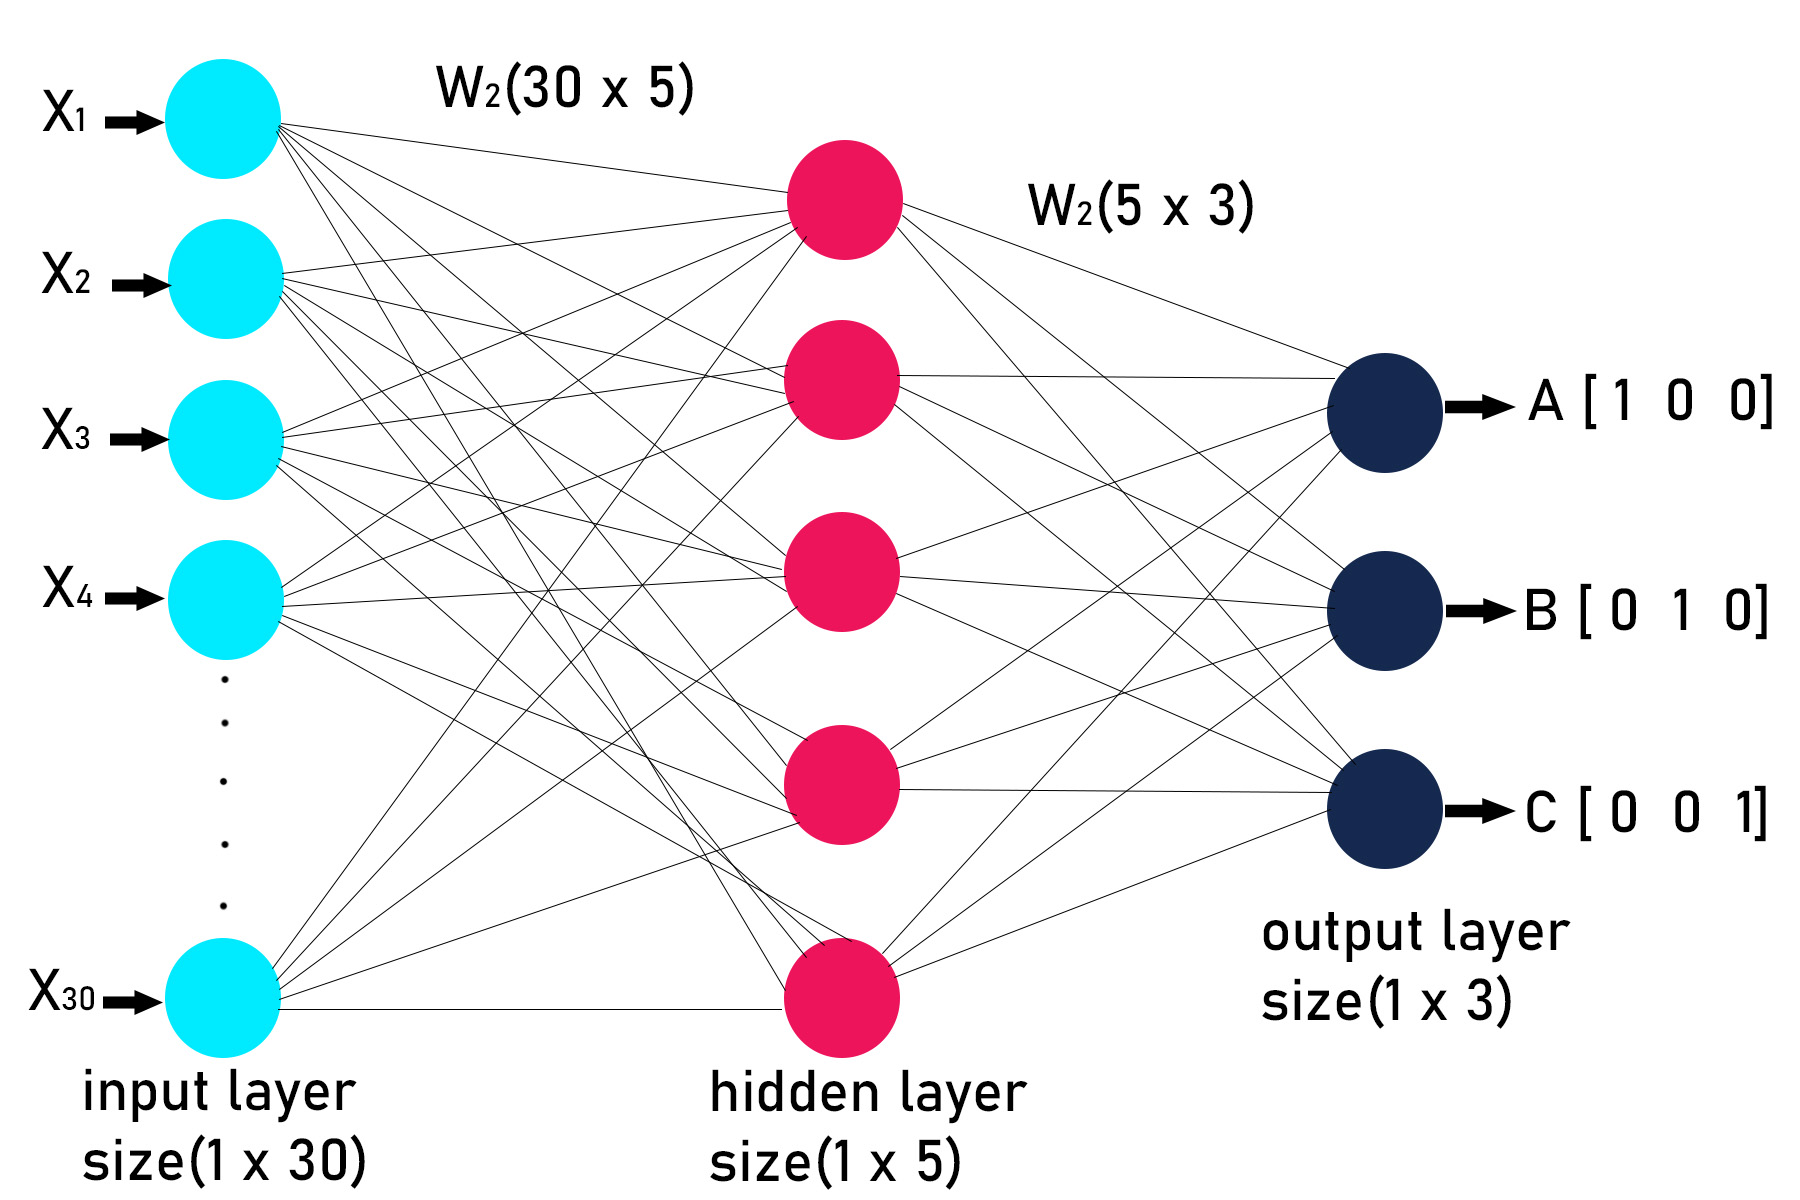

In [39]:
# Definiendo funcion de activacion

def sigmoid(x):
	return(1/(1 + np.exp(-x)))



# Aplicando el Feed forward de la red neuronal
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# Oculta
	z1 = x.dot(w1)# Entrada de la capa 1 (oculta)
	a1 = sigmoid(z1)# Salia para la entrada de la capa 2
	
	# Capa de salida
	z2 = a1.dot(w2)# entrada de la capa 2 o de salida
	a2 = sigmoid(z2)# salida de la capa
	return(a2)

# Generacion aleatoria de pesos
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# cálculo de la perdida con mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# capa oculta
	z1 = x.dot(w1)# entrada de la capa 1
	a1 = sigmoid(z1)# entrada de la capa 2 (salida)
	
	# capa de salida
	z2 = a1.dot(w2)# entrada de la capa de salida
	a2 = sigmoid(z2)# salida de la capa de salida
	# error en la capa de salida
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradiente para w1 y w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Actualizando parámetros
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




In [41]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 0.3680761   0.0088624   0.30610316  1.15176033  0.73732579]
 [ 0.92033982  1.33484037  1.77746366 -0.79507443  0.96064989]
 [ 0.21750855 -0.11188027  0.03650078  0.93962823  0.81477001]
 [ 0.60559033 -0.69024442 -0.16869386  0.30942912  0.0841887 ]
 [-1.7743934   2.28639804  0.77952579  0.40381175  0.88603962]
 [-1.12174662 -0.12647697 -0.65686841  1.27075259  0.38672227]
 [ 1.41967318  0.5874493   0.37013362 -2.26395785 -0.33747962]
 [ 0.48554438 -0.92636042 -0.69638493 -0.44757738  1.04466176]
 [-0.20730732  0.95681892 -0.93684196  0.02205538  0.51678723]
 [ 0.49195239  0.53094047 -1.34680158 -0.41019633 -1.98688848]
 [-0.84101064 -0.40958767  0.09494792  1.13473198 -1.20334879]
 [ 1.39660959  0.83161337  2.25873148  0.30158219 -0.16596943]
 [-0.20555327 -0.07696862 -0.10020705  0.54277938 -1.60954721]
 [-1.11942746  0.71649856  0.77932782  0.69356516  0.28562581]
 [-0.25426874 -0.55122026 -0.16778918  1.87926007  0.04944343]
 [-0.51519082 -0.58407165 -1.32075596 -2.19934068  0.73

In [43]:
"""The arguments of train function are data set list x, 
correct labels y, weights w1, w2, learning rate = 0.1, 
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of 
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 76.54506594531246
epochs: 2 ======== acc: 79.66211833664347
epochs: 3 ======== acc: 81.70177500068037
epochs: 4 ======== acc: 83.16933476475519
epochs: 5 ======== acc: 84.30998334667336
epochs: 6 ======== acc: 85.24175725357662
epochs: 7 ======== acc: 86.02926808584166
epochs: 8 ======== acc: 86.71140227817922
epochs: 9 ======== acc: 87.31354034223989
epochs: 10 ======== acc: 87.85361591932134
epochs: 11 ======== acc: 88.34515458796585
epochs: 12 ======== acc: 88.7987605274269
epochs: 13 ======== acc: 89.22287760312703
epochs: 14 ======== acc: 89.62424592821871
epochs: 15 ======== acc: 90.00822247606344
epochs: 16 ======== acc: 90.37901797047832
epochs: 17 ======== acc: 90.73986755654978
epochs: 18 ======== acc: 91.09314979726433
epochs: 19 ======== acc: 91.44047174288768
epochs: 20 ======== acc: 91.78273848910747
epochs: 21 ======== acc: 92.12022232565769
epochs: 22 ======== acc: 92.45264070138855
epochs: 23 ======== acc: 92.77924665693891
epochs: 24 ======== a

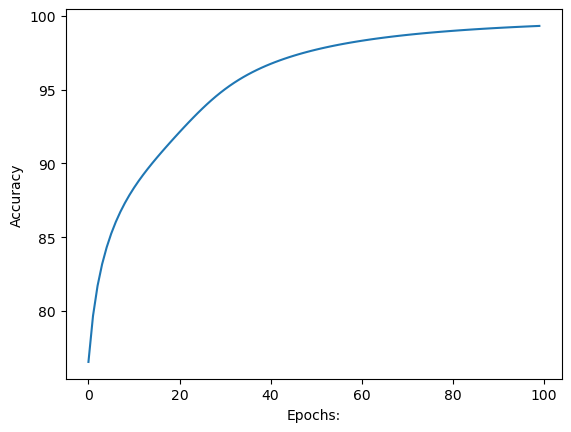

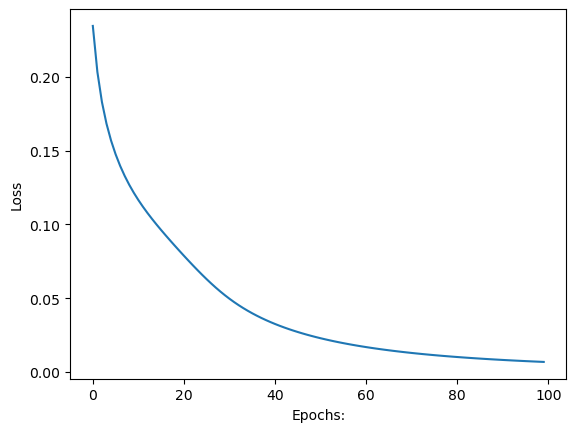

In [45]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


Image is of letter B.


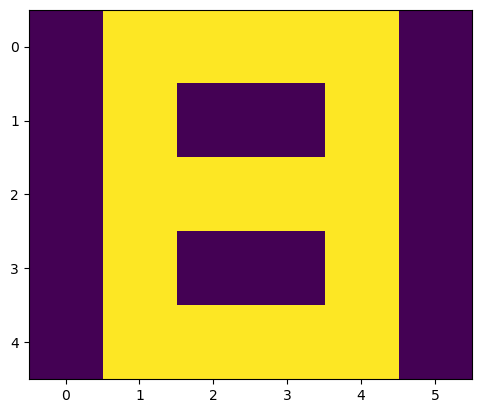

In [59]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
